In [1]:
# !pip install tensorflow

In [3]:
## Import Libraries ##
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
tf.__version__

# pip freeze > requirements.txt

'2.17.0'

In [4]:
## Read Data ##

data = pd.read_csv('Student_performance_data.csv')

# data.shape: (2392, 15)

# drop StudentID and GPA since they don't add value to the model
data = data.drop(['StudentID', 'GPA'], axis=1)

print(data.dtypes)

data.head()

Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GradeClass           float64
dtype: object


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


In [5]:
## Data Prep ##

# features and labels
features = data.iloc[:, 0:-1]
labels = data.iloc[:, -1] ## GradeClass

# one-hot encoding for categorical variables with more than 2 categories
categories = ['Ethnicity', 'ParentalEducation', 'ParentalSupport']
features = pd.get_dummies(features, columns=categories)

# convert one-hot encoded columns to integers
bool_columns = features.select_dtypes(include='bool').columns
features[bool_columns] = features[bool_columns].astype(int)

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

X_train.head()

,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,Ethnicity_0,...,ParentalEducation_0,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4,ParentalSupport_0,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4
642,18,1,18.118879,24,1,1,1,0,0,1,...,0,0,0,0,1,1,0,0,0,0
1752,16,1,2.469271,19,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1401,17,0,3.456401,25,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2032,17,1,15.838131,25,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
990,16,0,1.045373,19,1,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0


In [6]:
## Standardize Data ##

numericals = ['Age', 'StudyTimeWeekly', 'Absences']

# ColumnTransformer instance
ct = ColumnTransformer([('standardize', StandardScaler(), numericals)], remainder='passthrough')

# fit and transform the data
X_train_std = ct.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns)

# transform the test data
X_test_std = ct.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns = X_test.columns)

X_train_std.head()


,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,Ethnicity_0,...,ParentalEducation_0,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4,ParentalSupport_0,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4
0,1.372851,1.468159,1.105915,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,-0.405858,-1.276773,0.516509,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.483497,-1.103632,1.223797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.483497,1.068117,1.223797,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.405858,-1.526524,0.516509,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


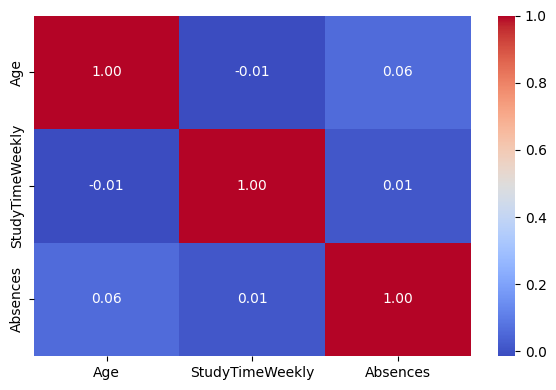

In [7]:
# correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(X_train_std[numericals].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.tight_layout()
plt.show()

# seems that there is no multicollinearity between the numerical variables

In [18]:
## Train Neural Network with package ##

# set global random seed
def set_seeds():
    seed=42
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.utils.set_random_seed(seed)
    tf.config.experimental.enable_op_determinism()

def model_design():
    set_seeds()

    # define the model
    model = Sequential()

    # input layer
    model.add(InputLayer(shape=(X_train_std.shape[1],)))

    # hidden layers
    model.add(Dense(32, activation='relu'))

    # output layer for 5 classes, softmax is for multi-class classification
    model.add(Dense(5, activation='softmax'))

    # optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    # compile the model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

def plot_history(model, batch_size=32, epochs=100):
    set_seeds()

    # train the model
    history = model.fit(X_train_std, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

    # plot the training and validation loss
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()


Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3080 - loss: 1.5485 - val_accuracy: 0.4804 - val_loss: 1.3654
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5071 - loss: 1.2848 - val_accuracy: 0.4909 - val_loss: 1.2203
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5171 - loss: 1.1610 - val_accuracy: 0.5352 - val_loss: 1.1239
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5503 - loss: 1.0758 - val_accuracy: 0.5614 - val_loss: 1.0589
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5938 - loss: 1.0160 - val_accuracy: 0.5953 - val_loss: 1.0177
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6375 - loss: 0.9757 - val_accuracy: 0.6266 - val_loss: 0.9918
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6548 - loss: 0.9477 - val_accuracy: 0.6345 - val_loss: 0.9754
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6639 - loss: 0.9277 - val_accuracy: 0.6397 - v

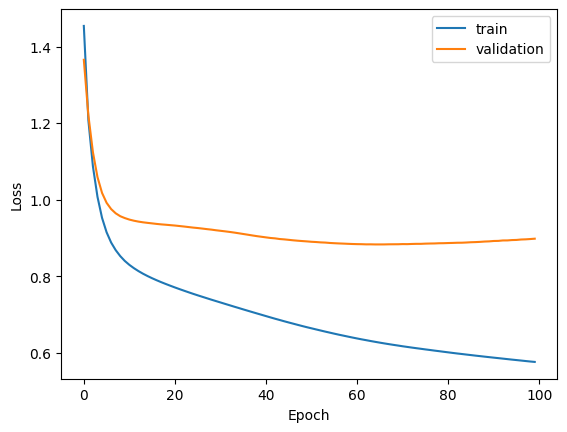

In [21]:
model = model_design()
plot_history(model)

Since the validation loss curve is significantly higher than the training loss curve and the two lines do not converge, it indicates that the model is overfitting. This means the model performs well on the training data but does not generalize well to new data.

Batch size: 8
Epoch 1/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4059 - loss: 1.4195 - val_accuracy: 0.5117 - val_loss: 1.1325
Epoch 2/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5624 - loss: 1.0633 - val_accuracy: 0.5979 - val_loss: 1.0106
Epoch 3/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6394 - loss: 0.9672 - val_accuracy: 0.6292 - val_loss: 0.9735
Epoch 4/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6776 - loss: 0.9287 - val_accuracy: 0.6527 - val_loss: 0.9586
Epoch 5/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6937 - loss: 0.9074 - val_accuracy: 0.6580 - val_loss: 0.9505
Epoch 6/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7090 - loss: 0.8917 - val_accuracy: 0.6658 - val_loss: 0.9461
Epoch 7/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7275 - loss: 0.8793 - val_accuracy: 0.6658 - val_loss: 0.9432
Epoch 8/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7240 - loss: 0.8

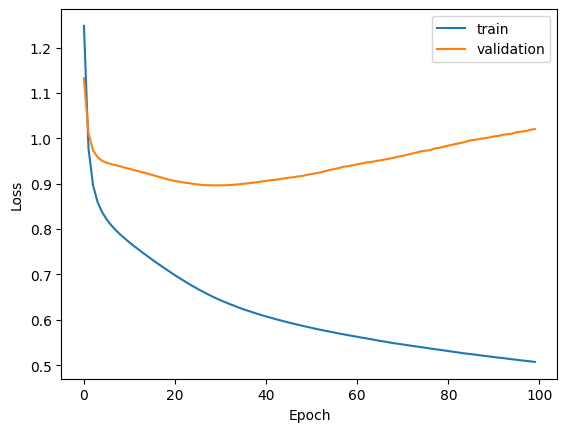

Batch size: 16
Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3616 - loss: 1.4910 - val_accuracy: 0.4856 - val_loss: 1.2464
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5139 - loss: 1.1693 - val_accuracy: 0.5379 - val_loss: 1.0951
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5719 - loss: 1.0447 - val_accuracy: 0.5822 - val_loss: 1.0211
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6364 - loss: 0.9796 - val_accuracy: 0.6266 - val_loss: 0.9861
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6571 - loss: 0.9441 - val_accuracy: 0.6423 - val_loss: 0.9687
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6809 - loss: 0.9219 - val_accuracy: 0.6449 - val_loss: 0.9582
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6948 - loss: 0.9057 - val_accuracy: 0.6449 - val_loss: 0.9522
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7060 - loss: 0.8939 - val_accur

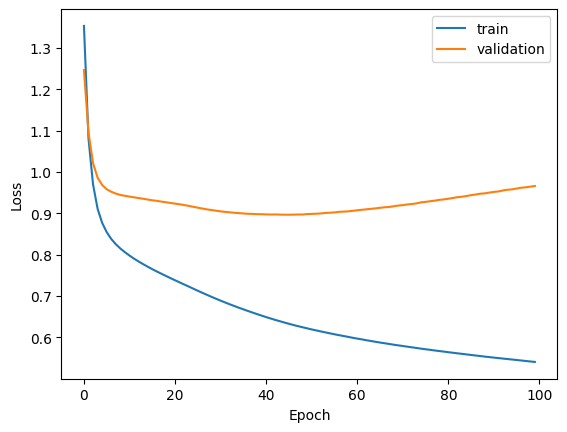

Batch size: 32
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3080 - loss: 1.5485 - val_accuracy: 0.4804 - val_loss: 1.3654
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5071 - loss: 1.2848 - val_accuracy: 0.4909 - val_loss: 1.2203
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5171 - loss: 1.1610 - val_accuracy: 0.5352 - val_loss: 1.1239
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5503 - loss: 1.0758 - val_accuracy: 0.5614 - val_loss: 1.0589
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5938 - loss: 1.0160 - val_accuracy: 0.5953 - val_loss: 1.0177
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6375 - loss: 0.9757 - val_accuracy: 0.6266 - val_loss: 0.9918
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6548 - loss: 0.9477 - val_accuracy: 0.6345 - val_loss: 0.9754
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6639 - loss: 0.9277 - val_accur

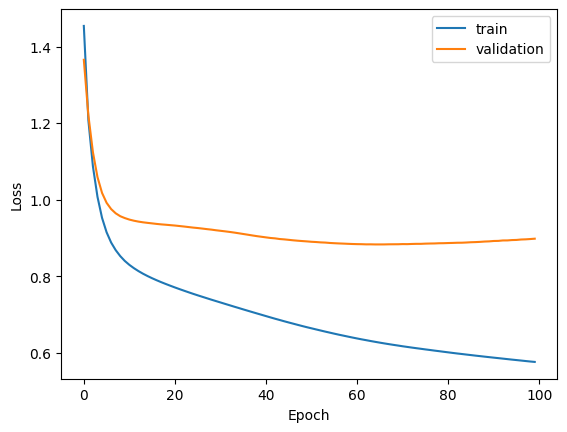

Batch size: 64
Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2640 - loss: 1.5892 - val_accuracy: 0.3916 - val_loss: 1.4754
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4762 - loss: 1.4042 - val_accuracy: 0.4856 - val_loss: 1.3480
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5101 - loss: 1.2856 - val_accuracy: 0.4909 - val_loss: 1.2631
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5085 - loss: 1.2065 - val_accuracy: 0.5013 - val_loss: 1.1954
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5242 - loss: 1.1437 - val_accuracy: 0.5300 - val_loss: 1.1390
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5446 - loss: 1.0909 - val_accuracy: 0.5483 - val_loss: 1.0937
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5707 - loss: 1.0482 - val_accuracy: 0.5666 - val_loss: 1.0589
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5935 - loss: 1.0138 - val_accur

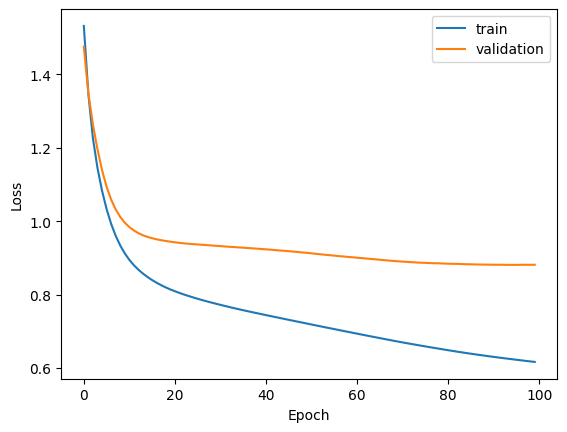

In [22]:
# hypertune batch size

# batch size
batch_sizes=[8, 32, 64]

for batch_size in batch_sizes:
    print(f'Batch size: {batch_size}')
    model = model_design()
    plot_history(model, batch_size)

A batch size of 32 is optimal because it minimizes the gap between training and validation loss, showing good generalization to unseen data

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3080 - loss: 1.5485 - val_accuracy: 0.4804 - val_loss: 1.3654
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5071 - loss: 1.2848 - val_accuracy: 0.4909 - val_loss: 1.2203
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5171 - loss: 1.1610 - val_accuracy: 0.5352 - val_loss: 1.1239
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5503 - loss: 1.0758 - val_accuracy: 0.5614 - val_loss: 1.0589
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5938 - loss: 1.0160 - val_accuracy: 0.5953 - val_loss: 1.0177
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6375 - loss: 0.9757 - val_accuracy: 0.6266 - val_loss: 0.9918
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6548 - loss: 0.9477 - val_accuracy: 0.6345 - val_loss: 0.9754
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6639 - loss: 0.9277 - val_accuracy: 0.6397 - v

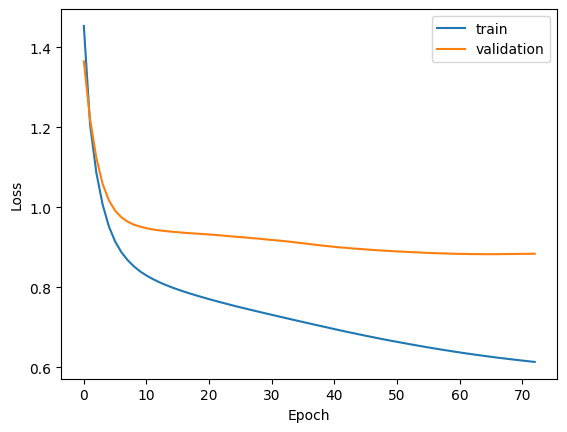

In [24]:
# try early stopping

def plot_history_early_stopping(model, batch_size=32, epochs=100): # epochs default 100
    set_seeds()

    # early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=8, mode='min', verbose=1)

    # train the model
    history = model.fit(X_train_std, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2, callbacks=[early_stopping])

    # plot the training and validation loss
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

model_2 = model_design()
plot_history_early_stopping(model_2)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1305 - loss: 1.8522 - val_accuracy: 0.2872 - val_loss: 1.5442
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3240 - loss: 1.5173 - val_accuracy: 0.4595 - val_loss: 1.3756
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4445 - loss: 1.3671 - val_accuracy: 0.4726 - val_loss: 1.2767
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4859 - loss: 1.2761 - val_accuracy: 0.4752 - val_loss: 1.2127
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4965 - loss: 1.2286 - val_accuracy: 0.4830 - val_loss: 1.1649
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5066 - loss: 1.1820 - val_accuracy: 0.4883 - val_loss: 1.1292
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5336 - loss: 1.1382 - val_accuracy: 0.5039 - val_loss: 1.0996
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5430 - loss: 1.1058 - val_accuracy: 0.5274 - v

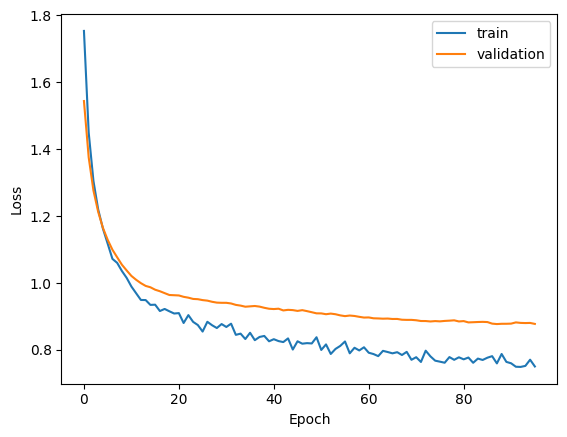

In [26]:
# model with dropout

def model_design_dropout():
        set_seeds()

        # define the model
        model = Sequential()

        # input layer
        model.add(InputLayer(shape=(X_train_std.shape[1],)))

        # hidden layers
        model.add(Dense(32, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.5))

        # output layer for 5 classes, softmax is for multi-class classification
        model.add(Dense(5, activation='softmax'))

        # optimizer
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

        # compile the model
        # use sparase_categorical_crossentropy for integer encoded labels
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        return model

model_3 = model_design_dropout()
plot_history_early_stopping(model_3)

The validation loss remains relatively high compared to the training loss, suggesting potential overfitting. To address this, we can reduce the model's complexity by replacing a single highly dense layer with three hidden layers, each containing 5 neurons. This adjustment leads to an improved validation loss of 0.7452, which is better than the previous models that exceeded 0.8.

Epoch 1/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4086 - loss: 1.5930 - val_accuracy: 0.4674 - val_loss: 1.5703
Epoch 2/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4877 - loss: 1.5483 - val_accuracy: 0.4700 - val_loss: 1.5245
Epoch 3/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4864 - loss: 1.4885 - val_accuracy: 0.4700 - val_loss: 1.4607
Epoch 4/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4877 - loss: 1.4069 - val_accuracy: 0.4778 - val_loss: 1.3807
Epoch 5/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4938 - loss: 1.3154 - val_accuracy: 0.5013 - val_loss: 1.2946
Epoch 6/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5166 - loss: 1.2230 - val_accuracy: 0.5379 - val_loss: 1.2005
Epoch 7/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5417 - loss: 1.1275 - val_accuracy: 0.5509 - val_loss: 1.1209
Epoch 8/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5745 - loss: 1.0463 - val_accuracy: 0.5666 - v

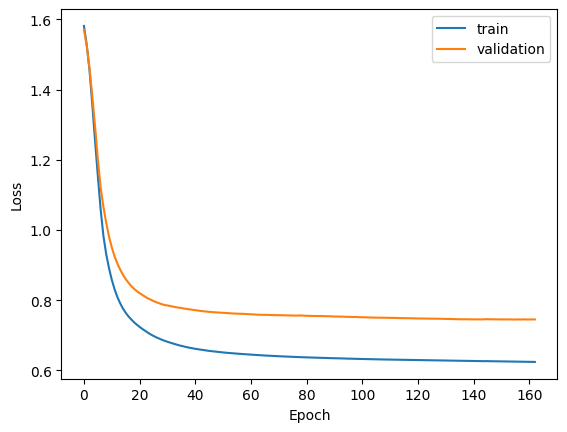

In [59]:
# model design dropout with less dense layer

def model_design_dropout_less_dense():
    set_seeds()
        
    # define the model
    model = Sequential()

    # input layer
    model.add(InputLayer(shape=(X_train_std.shape[1],)))

    # hidden layers
    model.add(Dense(5, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(5, activation='relu'))
    
    # output layer for 5 classes, softmax is for multi-class classification
    model.add(Dense(5, activation='softmax'))

    # optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    # compile the model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

model_4 = model_design_dropout_less_dense()
plot_history_early_stopping(model_4, epochs=200)